### Нормальность
Один из наиболее часто используемых тестов для проверки нормальности распределения является Shapiro-Wilk test.<br>
Идея теста: Предположим признак Х распределён нормально в ГС (генеральная совокупность). Случайным образом извлечем и упорядочим три элемента. И в идеале на графике все три точки должны лежать на одной прямой. 
Если распределение отличается от нормального используется Критерий Манна-Уитни. Он переводит все данные в ранговую шкалу. Такой критерий гораздо менее чувствителен к отклонениям от нормальности и может быть использован при наличии значительных выбросов в выборке.

##### Построение графиков для теста Шапиро-Уилка с рандомными значениями

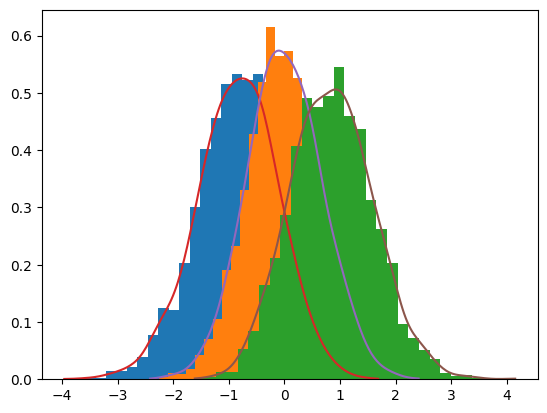

In [26]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt


def get_gaussian_density(dataset):

    density = ss.gaussian_kde(dataset)
    density.covariance_factor = lambda : 0.25
    density._compute_covariance()

    min_x, max_x = np.percentile(dataset, [0, 100])

    return np.linspace(min_x, max_x, 200), density


mu, sigma = 0, 1 # Среднее и стандартное отклонение
rnd = np.random.normal(mu, sigma, 10000)  # Выборка случайно распределенной величины


# Случайно выбираем по 3 пробы, сортируем их
random_samples = (
  sorted(np.random.choice(rnd, 3))
  for i in range(10000)
)

# Zip функция - без комментариев (функциональное программирование, есть на Вики)
# на выходе получаем массивы минимальных, средних и максимальных значений
rnd1, rnd2, rnd3 = zip(*random_samples)


# Гистограмма частот распределения случайной величины (опционально)
counts_1, x_range_1, ignored = plt.hist(rnd1, 30, density=True, histtype='barstacked')
counts_2, x_range_2, ignored = plt.hist(rnd2, 30, density=True, histtype='barstacked')
counts_3, x_range_3, ignored = plt.hist(rnd3, 30, density=True, histtype='barstacked')


# Гауссова оценка плотности ядра (приближение к гладкой функции)
x1, linear_1 = get_gaussian_density(rnd1)
x2, linear_2 = get_gaussian_density(rnd2)
x3, linear_3 = get_gaussian_density(rnd3)


plt.plot(x1, linear_1(x1))
plt.plot(x2, linear_2(x2))
plt.plot(x3, linear_3(x3))


plt.show()

#### Однофакторный дисперсионный анализ в Python
Расчёт F-критерия и p-значения

F_onewayResult(statistic=8.03730248114399, pvalue=0.0001524972289522953)


<Axes: xlabel='Therapy', ylabel='expr'>

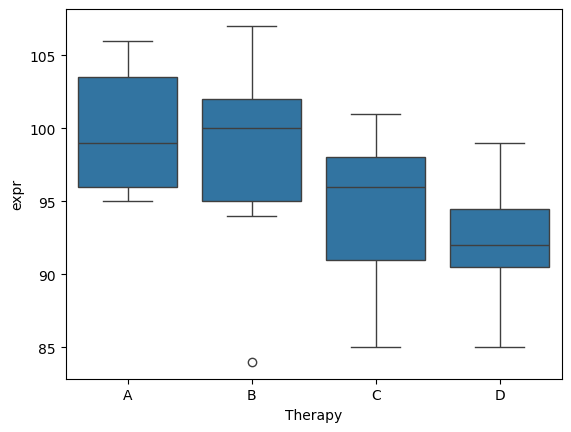

In [27]:
import pandas as pd
from scipy import stats
import seaborn

URL = 'https://stepik.org/media/attachments/lesson/8083/genetherapy.csv'
data = pd.read_csv(URL)
A = data[data["Therapy"] == "A"]["expr"]
B = data[data["Therapy"] == "B"]["expr"]
C = data[data["Therapy"] == "C"]["expr"]
D = data[data["Therapy"] == "D"]["expr"]
print(stats.f_oneway(A, B, C, D))              # рисуем boxplot для каждой группы
# data.boxplot('expr', by = 'Therapy', figsize=(12,8))
seaborn.boxplot(x = 'Therapy', y='expr', data = data)

<Axes: xlabel='Therapy', ylabel='expr'>

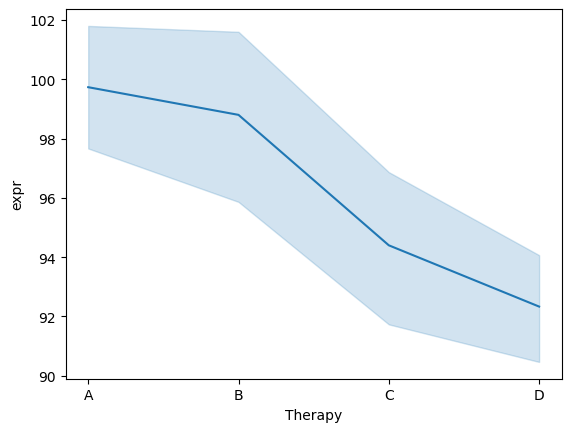

In [28]:
seaborn.lineplot(x = 'Therapy', y='expr', data = data)

#### Двухфакторный дисперсионный анализ

<Axes: xlabel='dose', ylabel='expr'>

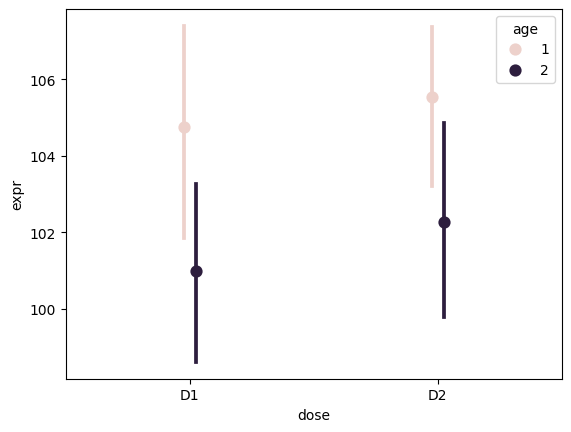

In [5]:
import seaborn as sns
import pandas as pd

data = pd.read_csv('atherosclerosis.csv')
sns.pointplot(x=data.dose, y=data.expr, hue=data.age, data=data, dodge=True, linestyles=['', ''])

In [6]:
from scipy import stats 
#Степени свободы
N =  len(data.expr)
m1 = len(data.age.unique())
m2 = len(data.dose.unique())
df_a = m1 - 1
df_b = m2 - 1
df_axb = df_a*df_b 
df_w = N - m1*m2
#Общее среднее
grand_mean = data['expr'].mean()
#Суммы квадратов
ssq_a = sum([(data[data.age ==i].expr.mean()-grand_mean)**2 for i in data.age])
ssq_b = sum([(data[data.dose ==i].expr.mean()-grand_mean)**2 for i in data.dose])
ssq_t = sum((data.expr - grand_mean)**2)
spl_age=[data[data.age == i] for i in data.age.unique()]
age_means=[[x_age[x_age.dose == d].expr.mean() for d in x_age.dose] for x_age in spl_age]
ssq_w = sum([sum((spl_age[i].expr-age_means[i])**2) for i in range(len(data.age.unique()))])
ssq_axb = ssq_t-ssq_a-ssq_b-ssq_w
#Средние квадраты
ms_a = ssq_a/df_a
ms_b = ssq_b/df_b
ms_axb = ssq_axb/df_axb
ms_w = ssq_w/df_w
#F-значения
f_a = ms_a/ms_w
f_b = ms_b/ms_w
f_axb = ms_axb/ms_w
#P-значения
p_a = stats.f.sf(f_a, df_a, df_w)
p_b = stats.f.sf(f_b, df_b, df_w)
p_axb = stats.f.sf(f_axb, df_axb, df_w)
#результаты
results = {'sum_sq':[ssq_a, ssq_b, ssq_axb, ssq_w],
           'df':[df_a, df_b, df_axb, df_w],
           'F':[f_a, f_b, f_axb, 'NaN'],
            'PR(>F)':[p_a, p_b, p_axb, 'NaN']}
columns=['sum_sq', 'df', 'F', 'PR(>F)']
aov_table1 = pd.DataFrame(results, columns=columns,
                          index=['age', 'dose', 
                          'age:dose', 'Residual'])
print(aov_table1)

               sum_sq  df         F    PR(>F)
age        197.452754   1  7.449841  0.008313
dose        16.912241   1  0.638094  0.427552
age:dose     0.927077   1  0.034978  0.852272
Residual  1590.257424  60       NaN       NaN


In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('expr ~ C(dose)*C(age)', data).fit()
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(dose),16.912241,1.0,0.638094,0.427552
C(age),197.452754,1.0,7.449841,0.008313
C(dose):C(age),0.927077,1.0,0.034978,0.852272
Residual,1590.257424,60.0,NaN,NaN


#### Корреляция и регрессия
Вычислим коэффициент корреляции: 

(Pearson's correlation coefficient, 2-tailed p-value) = PearsonRResult(statistic=-1.0, pvalue=0.0)


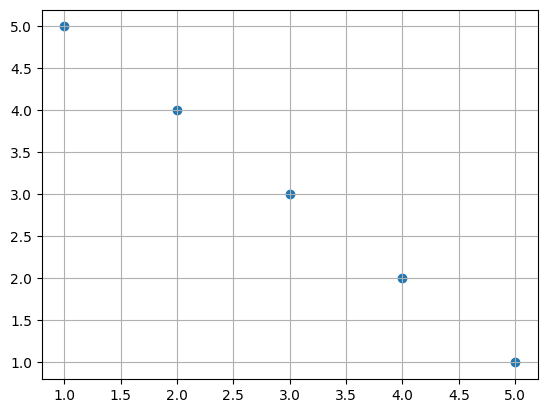

data: x and y
t = -inf, df = 3, p-value = 0.00000
z value: -inf
sigma value (i.e standard error): 0.7071067811865475
  Отклоняем 0 гипотезу в пользу альтернативной: коэффициент корелляции в генеральной совокупности != 0. p_val < 0.05
95 percent confidence interval:[-1. -1.]
PearsonCorellation: -1.0


C:\Users\Asus\AppData\Local\Temp\ipykernel_21720\1777632094.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  t = cor_pearson * ((len(x) - 2) / (1 - cor_pearson**2))**0.5
C:\Users\Asus\AppData\Local\Temp\ipykernel_21720\1777632094.py:19: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(cor_pearson)


In [31]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import random as r

def cortest(x,y):
    assert len(x)==len(y)
    
    #t value
    cor_pearson = stats.pearsonr(x, y)[0]
    df = len(x)-2
    
    t = cor_pearson * ((len(x) - 2) / (1 - cor_pearson**2))**0.5
    p_val = stats.t.sf(np.abs(t), df)*2
    print("data: x and y")
    print(f"t = {round(t,5)}, df = {df}, p-value = {p_val:.5f}")

    # Use the Fisher transformation to get z
    z = np.arctanh(cor_pearson)
    print("z value: {}".format(z))

    # And, the sigma value i.e standard error
    sigma = (1/((len(x)-3)**0.5))
    print("sigma value (i.e standard error): {}".format(sigma))

    # Get normal 95% interval probability density function for normal continuous random variable apply two-sided conditional formula
    cint = z + np.array([-1, 1]) * sigma * stats.norm.ppf((1+0.95)/2)
    
    #Finally take hyperbolic tangent to get interval values for 95%
    interval = np.tanh(cint)
    
    if p_val < 0.05:
        print("  Отклоняем 0 гипотезу в пользу альтернативной: коэффициент корелляции в генеральной совокупности != 0. p_val < 0.05")
    else:
        print("  Не можем отклонить 0 гипотезу: коэффициент корелляции в генеральной совокупности = 0. p_val >= 0.05")
        
    print(f"95 percent confidence interval:{interval}")
    print(f"PearsonCorellation: {cor_pearson}")

# ==================================================================  
# функция имитирущая случаные факторы
# р - настолько существенным будет случайный фактор
def randomize(arr, p):
    alpha = np.max(arr) - np.min(arr)
    res = np.zeros(arr.shape)
    for i, v in enumerate(arr):
        sign = 1 if r.choice([True, False]) else -1
        res[i] = v + sign*alpha*r.random()*p
    return res
    
# ==================================================================    
x = [4,5,2,3,1]
y = [2,1,4,3,5]

n = len(x)+len(y) 
pearson_corr = stats.pearsonr(x, y)
print(f"(Pearson's correlation coefficient, 2-tailed p-value) = {pearson_corr}")

# cтроим scatter plot
plt.scatter(x,y)
plt.grid()
plt.show()

cortest(x,y)

#### Условия применимости коэффициента корреляции:
1. Коэффициент корреляции применим если взаимосвязь линейна и монотонна
2. Нормальное распределение переменных (значительные выбросы могут негативно сказаться на значении коэффициента корреляции) <br>
Если имеются значительные выбросы, можно попробовать использовать непараметрические аналоги коэффициента корреляции, которые переходят от реальных значений переменных к ранжированным значениям.
* Коффициент корреляции Спирмана   <br>
* Коффициент корреляции Кендалла

(Pearson's correlation coefficient, 2-tailed p-value) = PearsonRResult(statistic=0.9559719614610548, pvalue=5.030745911981807e-11)


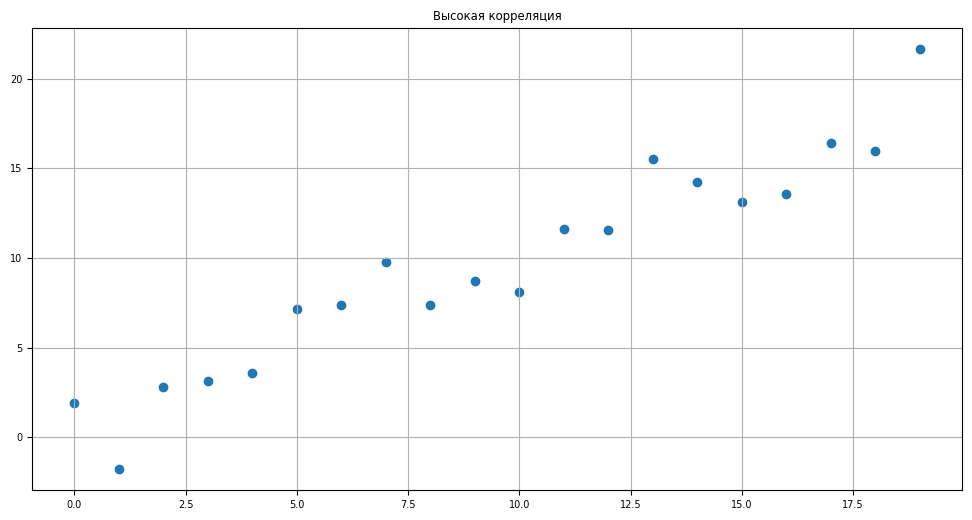

data: x and y
t = 13.82087, df = 18, p-value = 0.00000
z value: 1.8969079226859022
sigma value (i.e standard error): 0.24253562503633297
  Отклоняем 0 гипотезу в пользу альтернативной: коэффициент корелляции в генеральной совокупности != 0. p_val < 0.05
95 percent confidence interval:[0.88992117 0.98275188]
PearsonCorellation: 0.9559719614610548


In [105]:
x = np.array(range(30))
y = randomize(x, 0.1) # чем ближе к 0 значение, тем менее случайными будут значения y и выше будет корелляция

n = 20 # чем меньшее кол-во точек берем в пример, тем менее уверенные значения получаем
a,b = x[:n],y[:n]    
pearson_corr = stats.pearsonr(a, b)
print(f"(Pearson's correlation coefficient, 2-tailed p-value) = {pearson_corr}")

# cтроим scatter plot
plt.scatter(a,b)
plt.title('Высокая корреляция')
plt.grid()
plt.show()

cortest(a,b)

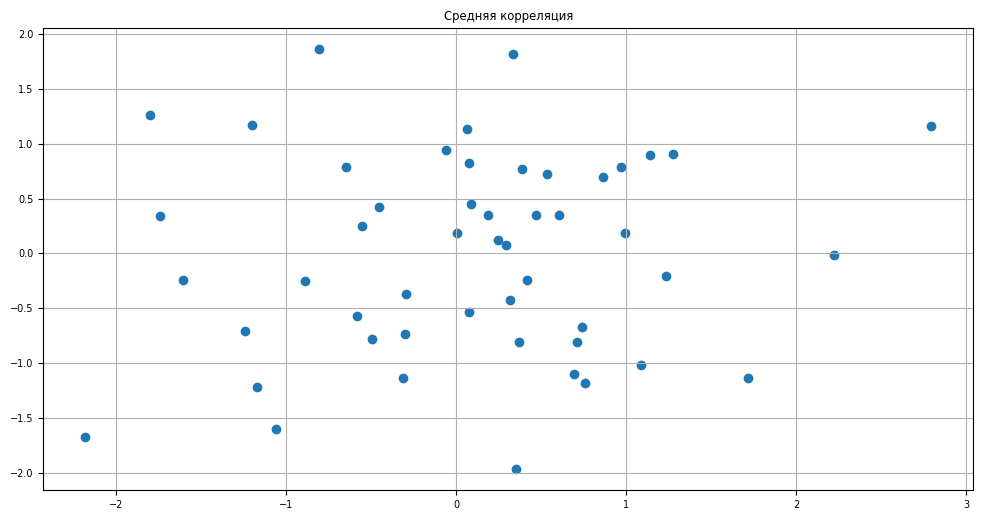

correlation: PearsonRResult(statistic=0.10177605661007175, pvalue=0.48187350592835143)


In [104]:
import statistics
# так вычисляем корреляцию
X = stats.norm.rvs(loc=0, scale=1, size=50)
Y = stats.norm.rvs(loc=0, scale=1, size=50)
corr = stats.pearsonr(X, Y)

# так строим scatter plot
plt.scatter(X,Y)
plt.title('Низкая корреляция')
plt.grid()
plt.show()

print("correlation: {}".format(corr))

#### Одномерный регрессионный анализ

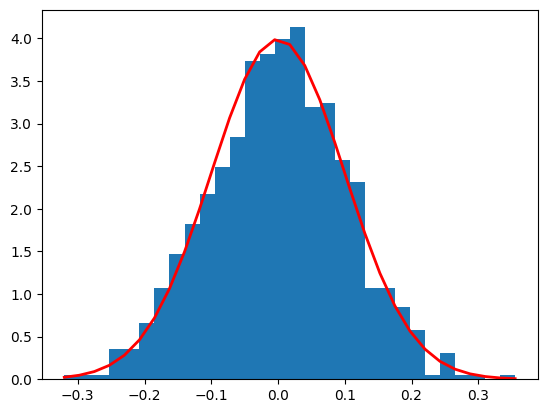

In [57]:
# Нормальное распределение
import matplotlib.pyplot as plt

mu, sigma = 0, 0.1                                        #среднее и стандартное отклонение
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

#### Проверка распределения на нормальность

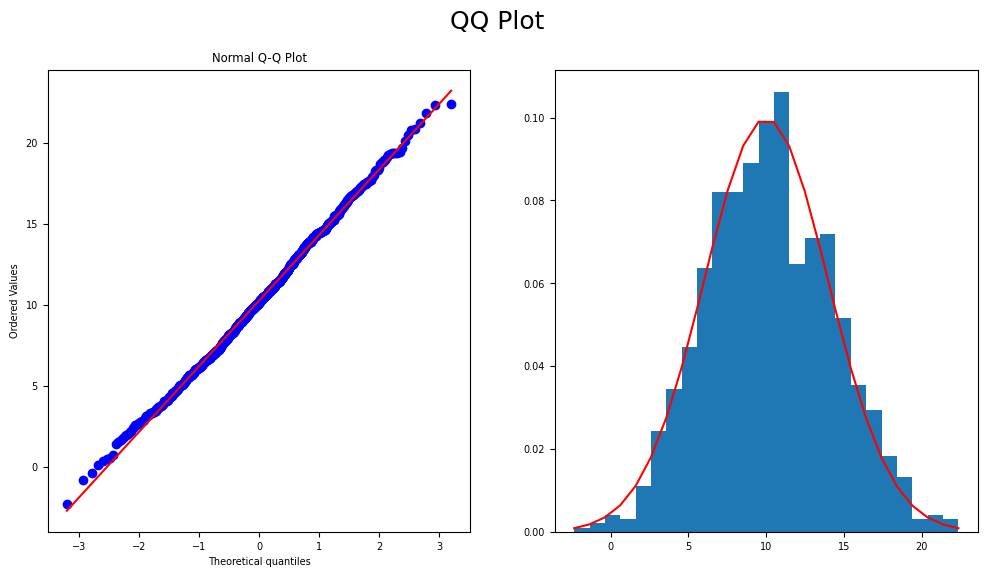

In [92]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 6]

mu, sigma = 10, 4
n = 1000 # с ростом числа точек в распределении qq-plot стремится к прямой
sequence = np.random.normal(mu, sigma, n)


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('QQ Plot', fontsize=18)

# Q-Q Plot graph
stats.probplot(sequence, dist="norm", plot=ax1)
ax1.set_title("Normal Q-Q Plot")

# normal distribution histogram + distribution
count, bins, _ = ax2.hist(sequence, 25, density=True)
p_x = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )
ax2.plot(bins, p_x, color='r')
 

plt.show()

Практический пример одномерной регрессии:

In [121]:
import statsmodels.formula.api as smf

url = 'https://stepik.org/media/attachments/lesson/8086/states.csv'
exam = pd.read_csv(url)
exam.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


Корреляция: -0.7468582531582506


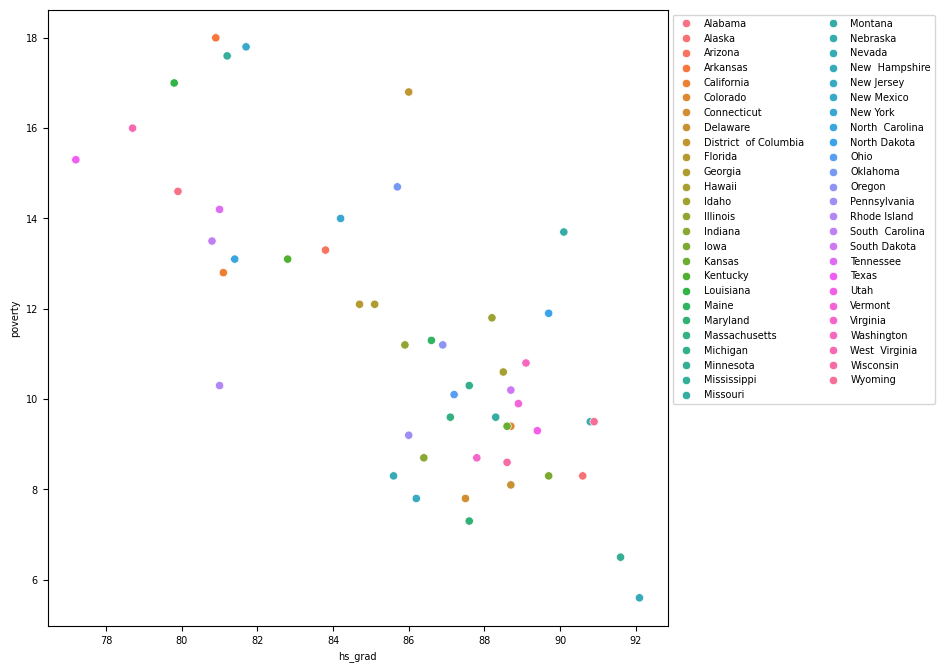

In [122]:
# рисуем диаграмму рассеяния
fig, ax = plt.subplots(figsize=(8,8))
g = sns.scatterplot(x='hs_grad', y='poverty', hue='state', data=exam)

# трансформировать легенду
h,l = g.get_legend_handles_labels()
g.legend(h,l, ncol=2, bbox_to_anchor=(1, 1), loc=2)

print( f"Корреляция: {np.corrcoef(exam['hs_grad'], exam['poverty'])[0][1]}")

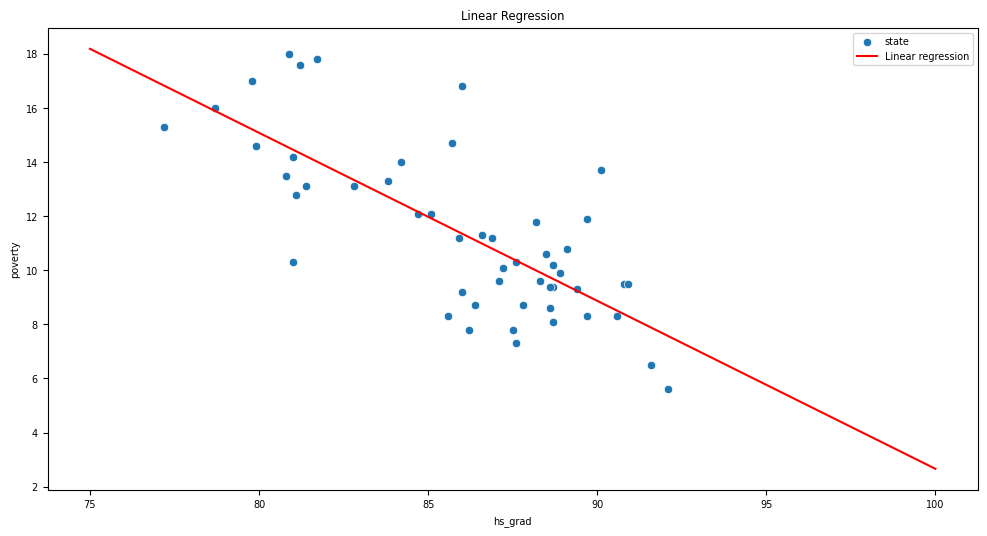

In [133]:
slope, intercept, r, p, std_err =  linregress(exam['hs_grad'], exam['poverty'])
x = np.linspace(75, 100)

reg = lambda x: intercept + slope*x
sns.scatterplot(x='hs_grad', y='poverty', data=exam, label='state')
plt.title('Linear Regression')
plt.plot(x, reg(x), color='red', label='Linear regression')
plt.legend()
plt.show()

In [136]:
# model = smf.mixedlm('poverty ~ hs_grad', data=exam, groups=exam['state']).fit()
# display(model.summary())
model = smf.ols('poverty ~ hs_grad', data=exam).fit()
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     61.81
Date:                Mon, 27 May 2024   Prob (F-statistic):           3.11e-10
Time:                        20:58:12   Log-Likelihood:                -108.74
No. Observations:                  51   AIC:                             221.5
Df Residuals:                      49   BIC:                             225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.7810      6.803      9.523      0.000      51.111      78.451
hs_grad       -0.6212      0.079     -7.862      0.000      -0.780      -0.462
==============================================================================
Omnibus:                        3.534   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                2.653
Skew:                           0.540   Prob(JB):                        0.265
Kurtosis:                       3.289   Cond. No.                     2.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Вывод: 
* Т.к. p-value < 0.05 , мы отклоняем нулевую гипотезу о том, что нет взаимосвязи между уровнем бедности и уровнем среднего образования.
* В штате, где уровень людей со средним образованием будет равен нулю, будет 64.78%(=b0) людей, проживающих за чертой бедности.
* С каждым 1% увеличения людей, имеющих среднее образование, количество людей, проживающих в бедности уменьшается на 0.62% (=b1).
* Практически 56% (=R-squared) изменчивости нашей зависимой переменной объясняется нашей моделью.
* Линия тренда y = 64.78 - 0.62 * x позволяет предсказывать значения y по интересующей нас x. (Бедность = 64.78 - 0.62 * Образование)